In [22]:
import pandas as pd
data=pd.read_table('./data/datingTestSet2.txt',sep='\t',header=None)
data.head()
#测试常用的人工智能算法，如：线性回归、k近邻算法、支持向量机算法

,0,1,2,3
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


In [23]:
data.shape
# 查看字段信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   int64  
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [24]:
from sklearn.model_selection import train_test_split
# 定义函数
def dataSplit(data, label, test_size=0.1):
    """
    函数功能：数据拆分为 训练集 和测试集
    @param dataSet: 数据集
    @param label:  标签
    @return: X_train , Y_train, X_test, Y_test
    """
    X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=test_size, random_state=0)
    return  X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = dataSplit(data=data.iloc[:, :3], label=data.iloc[:,3])


In [27]:
X=data.iloc[:, :3]
Y=data.iloc[:,3]
# X
Y

0      3
1      2
2      1
3      1
4      1
      ..
995    2
996    1
997    3
998    3
999    3
Name: 3, Length: 1000, dtype: int64

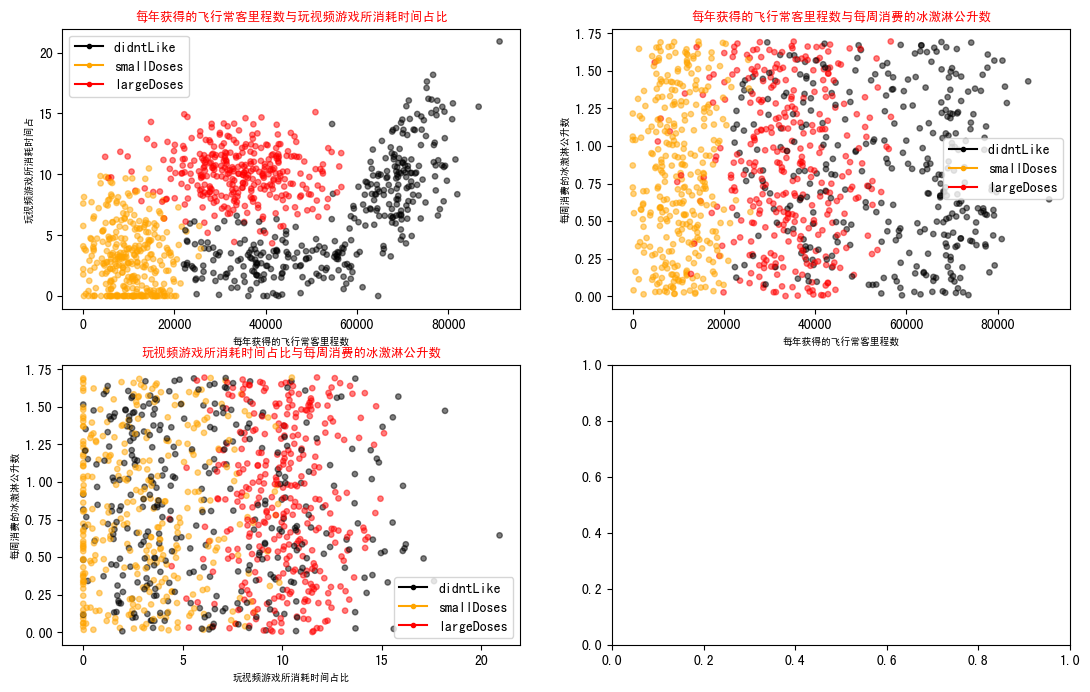

In [34]:
from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
 
def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()
    #得到文件行数
    numberOfLines = len(arrayOLines)
    #返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines,3))
    #返回的分类标签向量
    classLabelVector = []
    #行的索引值
    index = 0
    for line in arrayOLines:
        #s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        #使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        #将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index,:] = listFromLine[0:3]
        #根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == '1':
            classLabelVector.append(1)
        elif listFromLine[-1] == '2':
            classLabelVector.append(2)
        elif listFromLine[-1] == '3':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector
 
"""
函数说明:可视化数据
Parameters:
    datingDataMat - 特征矩阵
    datingLabels - 分类Label
Returns:
    无
Modify:
    2022-12-11
"""
def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    # font = FontProperties(fname=r"C:\windows\fonts\simsun.ttc", size=14)
    # FontProperties=font  用该方法设置字体时出错，且查找资料也找不了，我就弃用该方法了
    # 直接设置fontproperties='SimHei',fontsize=14
    # 我想灵活学习才是王道
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))
 
    # numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'每年获得的飞行常客里程数与玩视频游戏所消耗时间占比',fontproperties='SimHei',fontsize=14)
    axs0_xlabel_text = axs[0][0].set_xlabel(u'每年获得的飞行常客里程数',fontproperties='SimHei',fontsize=14)
    axs0_ylabel_text = axs[0][0].set_ylabel(u'玩视频游戏所消耗时间占',fontproperties='SimHei',fontsize=14)
    plt.setp(axs0_title_text, size=9, weight='bold', color='red')
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
 
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'每年获得的飞行常客里程数与每周消费的冰激淋公升数',fontproperties='SimHei',fontsize=14)
    axs1_xlabel_text = axs[0][1].set_xlabel(u'每年获得的飞行常客里程数',fontproperties='SimHei',fontsize=14)
    axs1_ylabel_text = axs[0][1].set_ylabel(u'每周消费的冰激淋公升数',fontproperties='SimHei',fontsize=14)
    plt.setp(axs1_title_text, size=9, weight='bold', color='red')
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')
 
    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'玩视频游戏所消耗时间占比与每周消费的冰激淋公升数',fontproperties='SimHei',fontsize=14)
    axs2_xlabel_text = axs[1][0].set_xlabel(u'玩视频游戏所消耗时间占比',fontproperties='SimHei',fontsize=14)
    axs2_ylabel_text = axs[1][0].set_ylabel(u'每周消费的冰激淋公升数',fontproperties='SimHei',fontsize=14)
    plt.setp(axs2_title_text, size=9, weight='bold', color='red')
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black')
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()
 
"""
函数说明:main函数
Parameters:
    无
Returns:
    无
Modify:
    2022-12-11
"""
    #打开的文件名
filename = "./data/datingTestSet2.txt"
#打开并处理数据
datingDataMat, datingLabels = file2matrix(filename)
showdatas(datingDataMat, datingLabels)
# datingDataMat

In [42]:

import numpy as np
 
 
def file2matrix(filename):
    # 打开文件
    fr = open(filename)
    # 读取文件所有内容
    arrayOLines = fr.readlines()
    # 得到文件行数
    numberOfLines = len(arrayOLines)
    # 返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines, 3))
    # 返回的分类标签向量
    classLabelVector = []
    # 行的索引值
    index = 0
    for line in arrayOLines:
        # s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        # 使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        # 将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index, :] = listFromLine[0:3]
        # 根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == '1':
            classLabelVector.append(1)
        elif listFromLine[-1] == '2':
            classLabelVector.append(2)
        elif listFromLine[-1] == '3':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector
 
 
"""
函数说明:对数据进行归一化
Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
Modify:
    2022-12-11
"""
 
 
def autoNorm(dataSet):
    # 获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 最大值和最小值的范围
    ranges = maxVals - minVals
    # shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    # 返回dataSet的行数
    m = dataSet.shape[0]
    # 原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    # 除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    # 返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals
 
 
"""
函数说明:main函数
Parameters:
    无
Returns:
    无
Modify:
    2022-12-11
"""
    # 打开的文件名
filename = "./data/datingTestSet2.txt"
    # 打开并处理数据
datingDataMat, datingLabels = file2matrix(filename)
normDataSet, ranges, minVals = autoNorm(datingDataMat)
print(normDataSet)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


In [44]:

import numpy as np
import operator
 

 
 
def classify0(inX, dataSet, labels, k):
    # numpy函数shape[0]返回dataSet的行数
    dataSetSize = dataSet.shape[0]
    # 在列向量方向上重复inX共1次(横向),行向量方向上重复inX共dataSetSize次(纵向)
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    # 二维特征相减后平方
    sqDiffMat = diffMat ** 2
    # sum()所有元素相加,sum(0)列相加,sum(1)行相加
    sqDistances = sqDiffMat.sum(axis=1)
    # 开方,计算出距离
    distances = sqDistances ** 0.5
    # 返回distances中元素从小到大排序后的索引值
    sortedDistIndices = distances.argsort()
    # 定一个记录类别次数的字典
    classCount = {}
    for i in range(k):
        # 取出前k个元素的类别
        voteIlabel = labels[sortedDistIndices[i]]
        # dict.get(key,default=None),字典的get()方法,返回指定键的值,如果值不在字典中返回默认值。
        # 计算类别次数
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # python3中用items()替换python2中的iteritems()
    # key=operator.itemgetter(1)根据字典的值进行排序
    # key=operator.itemgetter(0)根据字典的键进行排序
    # reverse降序排序字典
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # 返回次数最多的类别,即所要分类的类别
    return sortedClassCount[0][0]
 

def file2matrix(filename):
    # 打开文件
    fr = open(filename)
    # 读取文件所有内容
    arrayOLines = fr.readlines()
    # 得到文件行数
    numberOfLines = len(arrayOLines)
    # 返回的NumPy矩阵,解析完成的数据:numberOfLines行,3列
    returnMat = np.zeros((numberOfLines, 3))
    # 返回的分类标签向量
    classLabelVector = []
    # 行的索引值
    index = 0
    for line in arrayOLines:
        # s.strip(rm)，当rm空时,默认删除空白符(包括'\n','\r','\t',' ')
        line = line.strip()
        # 使用s.split(str="",num=string,cout(str))将字符串根据'\t'分隔符进行切片。
        listFromLine = line.split('\t')
        # 将数据前三列提取出来,存放到returnMat的NumPy矩阵中,也就是特征矩阵
        returnMat[index, :] = listFromLine[0:3]
        # 根据文本中标记的喜欢的程度进行分类,1代表不喜欢,2代表魅力一般,3代表极具魅力
        if listFromLine[-1] == '1':
            classLabelVector.append(1)
        elif listFromLine[-1] == '2':
            classLabelVector.append(2)
        elif listFromLine[-1] == '3':
            classLabelVector.append(3)
        index += 1
    return returnMat, classLabelVector
 
 
"""
函数说明:对数据进行归一化
Parameters:
    dataSet - 特征矩阵
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
Modify:
    2022-12-11
"""
 

def autoNorm(dataSet):
    # 获得数据的最小值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    # 最大值和最小值的范围
    ranges = maxVals - minVals
    # shape(dataSet)返回dataSet的矩阵行列数
    normDataSet = np.zeros(np.shape(dataSet))
    # 返回dataSet的行数
    m = dataSet.shape[0]
    # 原始值减去最小值
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    # 除以最大和最小值的差,得到归一化数据
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    # 返回归一化数据结果,数据范围,最小值
    return normDataSet, ranges, minVals
 
 
"""
函数说明:分类器测试函数
Parameters:
    无
Returns:
    normDataSet - 归一化后的特征矩阵
    ranges - 数据范围
    minVals - 数据最小值
Modify:
    2022-12-11
"""
 

def datingClassTest():
    # 打开的文件名
    filename = "./data/datingTestSet2.txt"
    # 将返回的特征矩阵和分类向量分别存储到datingDataMat和datingLabels中
    datingDataMat, datingLabels = file2matrix(filename)
    # 取所有数据的百分之十
    hoRatio = 0.10
    # 数据归一化,返回归一化后的矩阵,数据范围,数据最小值
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # 获得normMat的行数
    m = normMat.shape[0]
    # 百分之十的测试数据的个数
    numTestVecs = int(m * hoRatio)
    # 分类错误计数
    errorCount = 0.0
 
    for i in range(numTestVecs):
        # 前numTestVecs个数据作为测试集,后m-numTestVecs个数据作为训练集
        classifierResult = classify0(normMat[i, :], normMat[numTestVecs:m, :],
                                     datingLabels[numTestVecs:m], 4)
        print("分类结果:%d\t真实类别:%d" % (classifierResult, datingLabels[i]))
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
    print("错误率:%f%%" % (errorCount / float(numTestVecs) * 100))

datingClassTest()

分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:2	真实类别:2
分类结果:3	真实类别:3
分类结果:1	真实类别:1
分类结果:2	真实类别:2
分类结果:3